# Lab 3.2 - Student Notebook

## Overview

This lab is a continuation of the guided labs in Module 3. 

## Introducing the business scenario

You work for a healthcare provider, and want to improve the detection of abnormalities in orthopedic patients. 

You are tasked with solving this problem by using machine learning (ML). You have access to a dataset that contains six biomechanical features and a target of *normal* or *abnormal*. You can use this dataset to train an ML model to predict if a patient will have an abnormality.

## About this dataset
This biomedical dataset was built by Dr. Henrique da Mota during a medical residence period in the Group of Applied Research in Orthopaedics (GARO) of the Centre Médico-Chirurgical de Réadaptation des Massues, Lyon, France. The data has been organized in two different, but related, classification tasks. 

The first task consists in classifying patients as belonging to one of three categories: 

- *Normal* (100 patients)
- *Disk Hernia* (60 patients)
- *Spondylolisthesis* (150 patients)

For the second task, the categories *Disk Hernia* and *Spondylolisthesis* were merged into a single category that is labeled as *abnormal*. Thus, the second task consists in classifying patients as belonging to one of two categories: *Normal* (100 patients) or *Abnormal* (210 patients).


## Attribute information

Each patient is represented in the dataset by six biomechanical attributes that are derived from the shape and orientation of the pelvis and lumbar spine (in this order): 

- Pelvic incidence
- Pelvic tilt
- Lumbar lordosis angle
- Sacral slope
- Pelvic radius
- Grade of spondylolisthesis

The following convention is used for the class labels: 
- DH (Disk Hernia)
- Spondylolisthesis (SL)
- Normal (NO) 
- Abnormal (AB)


For more information about this dataset, see the [Vertebral Column dataset webpage](http://archive.ics.uci.edu/ml/datasets/Vertebral+Column).

## Dataset attributions
This dataset was obtained from:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository (http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.


# Lab setup
Because this solution is split across several labs in this module, you must run the following cells so that you can load the data:

## Importing the data

In [21]:
import warnings, requests, zipfile, io
warnings.simplefilter('ignore')
import pandas as pd
from scipy.io import arff

In [22]:
f_zip = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00212/vertebral_column_data.zip'
r = requests.get(f_zip, stream=True)
Vertebral_zip = zipfile.ZipFile(io.BytesIO(r.content))
Vertebral_zip.extractall()

In [23]:
data = arff.loadarff('column_2C_weka.arff')
df = pd.DataFrame(data[0])

# Step 1: Exploring the data
You will start by looking at the data in the dataset. 

To get the most out of this lab, carefully read the instructions and code before you run the cells. Take time to experiment!

First, you will use **shape** to examine the number of rows and columns

In [24]:
df.shape

(310, 7)

You will now get a list of the columns.

In [25]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

You can see the six biomechanical features, and the target column is named *class*.

What column types do you have?

In [26]:
df.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

You have six floats for the biomechanical features, but the target is a class.

To look at the statistics for the first column, you can use the **describe** function.

In [27]:
df['pelvic_incidence'].describe()

count    310.000000
mean      60.496653
std       17.236520
min       26.147921
25%       46.430294
50%       58.691038
75%       72.877696
max      129.834041
Name: pelvic_incidence, dtype: float64

**Challenge Task:** Try updating the code in the previous cell to view the statistics of other features. Which features have outliers that you might want to examine?

Because this dataset only has six features, you can display the statistics of each feature by running **describe** on the entire DataFrame.

In [28]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


**Question:** Are there any features that aren't well-distributed? Are there any features with outliers that you want to look at? Does it look like there might be any correlations between features?

It's not always easy to make observations when you look only at numbers, so you will now plot these values.

<Axes: >

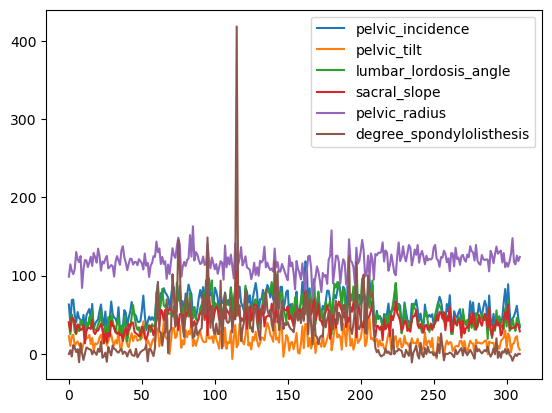

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot()

You will now plot the distribution of the values for each feature by using a *density or kernel density estimate (KDE) plot*.

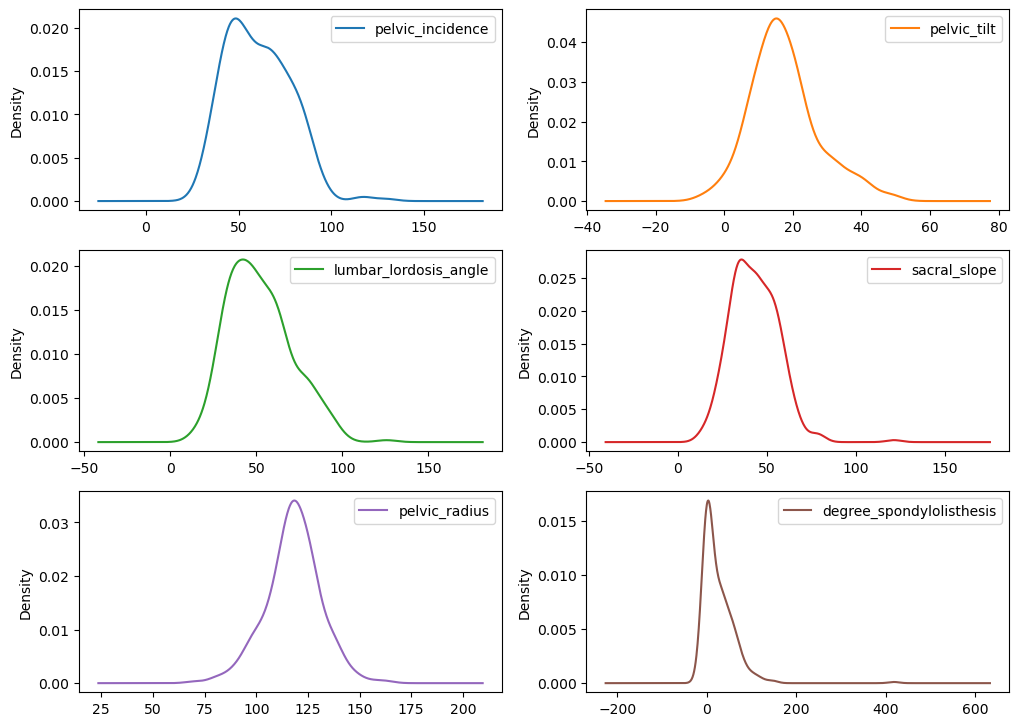

In [10]:
df.plot(kind='density',subplots=True,layout=(4,2),figsize=(12,12),sharex=False)
plt.show()

Do any of the visualizations stand out?

### Investigating degree_spondylolisthesis
You will now investigate **degree_spondylolisthesis**:

Start with the *density plot*, which if you recall, shows the *distribution of the values*.

<Axes: ylabel='Density'>

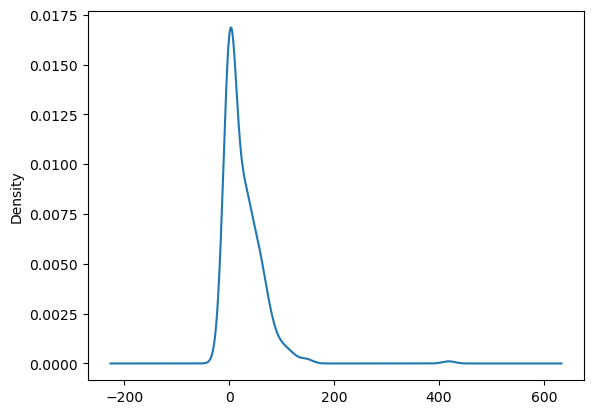

In [11]:
df['degree_spondylolisthesis'].plot.density()

A density plot smooths out the curve. It looks like there might be an increase around **400**. Visualize the data with a *histogram*.

<Axes: ylabel='Frequency'>

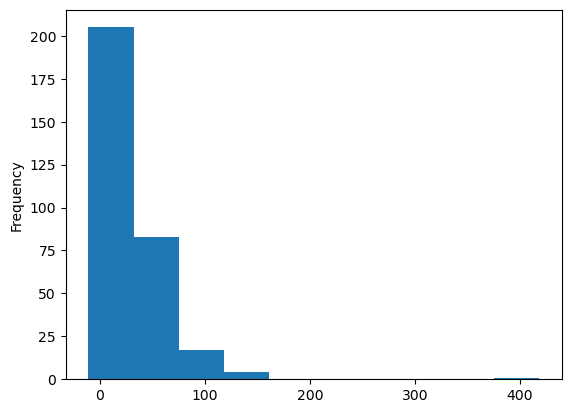

In [12]:
df['degree_spondylolisthesis'].plot.hist()

By using a *box plot*, you can see if there any outliers.

<Axes: >

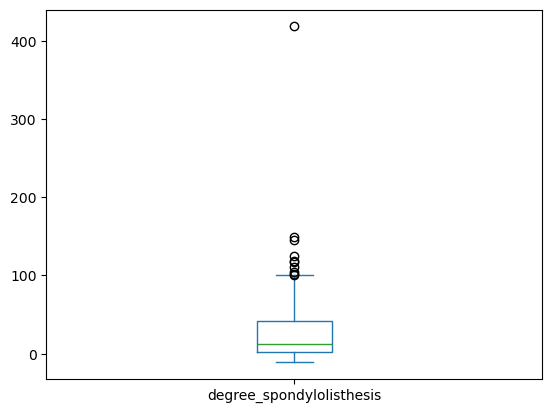

In [13]:
df['degree_spondylolisthesis'].plot.box()

You can see a small increase around **400**. Sometimes, outliers like this can throw off training models. The only way to find out would be to test the model both with and without the outliers, and compare the models' scores. However, this is a task for a later lab.

You can see from the box plot that there seems to be a cluster above what *looks like* the maximum. Is there a correlation between those data points and the target?

Before you can look for a correlation, you will examine the target more.

### Analyzing the target

First, what kind of distribution do you have?

In [14]:
df['class'].value_counts()

class
b'Abnormal'    210
b'Normal'      100
Name: count, dtype: int64

It loks like you have about 1/3 *Normal* and 2/3 *Abnormal*. This result should be fine, but if you could get more data, you would want to try and balance the numbers more. 

The class values aren't going to work for your ML model, so you will convert this column to a numeric value. You can use a *mapper* for this task.

In [15]:
class_mapper = {b'Abnormal':1,b'Normal':0}
df['class']=df['class'].replace(class_mapper)

Now, you can plot the *degree_spondylolisthesis* against the target.

<Axes: xlabel='class', ylabel='degree_spondylolisthesis'>

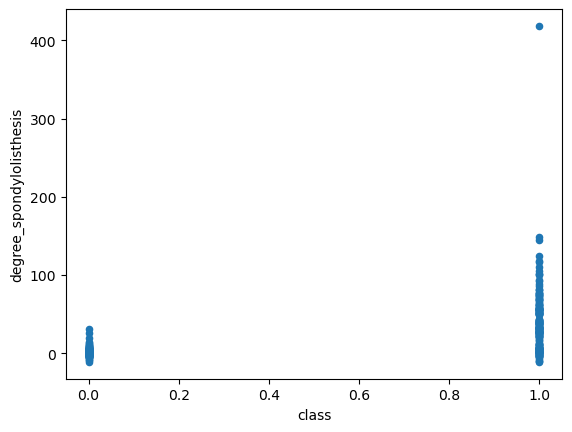

In [16]:
df.plot.scatter(y='degree_spondylolisthesis',x='class')

What do you see?

Though there appears to be a link between the high values and the abnormalities, there are also many values that are in the same range. So, there could be a correlation, but it's worth taking a closer look at the data.

**Challenge Task:** By using the previous cells, determine how the values of other features correspond against the target.

### Visualizing multiple variables

As the previous steps demonstrate, visualizations can be very powerful. Sometimes, you will want to analyze multiple data points. You can do this by using *groupby*.

Plotting out the features for both *Abnormal* and *Normal* values side by side might help you observe any other differences.

0         Axes(0.1,0.15;0.363636x0.75)
1    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

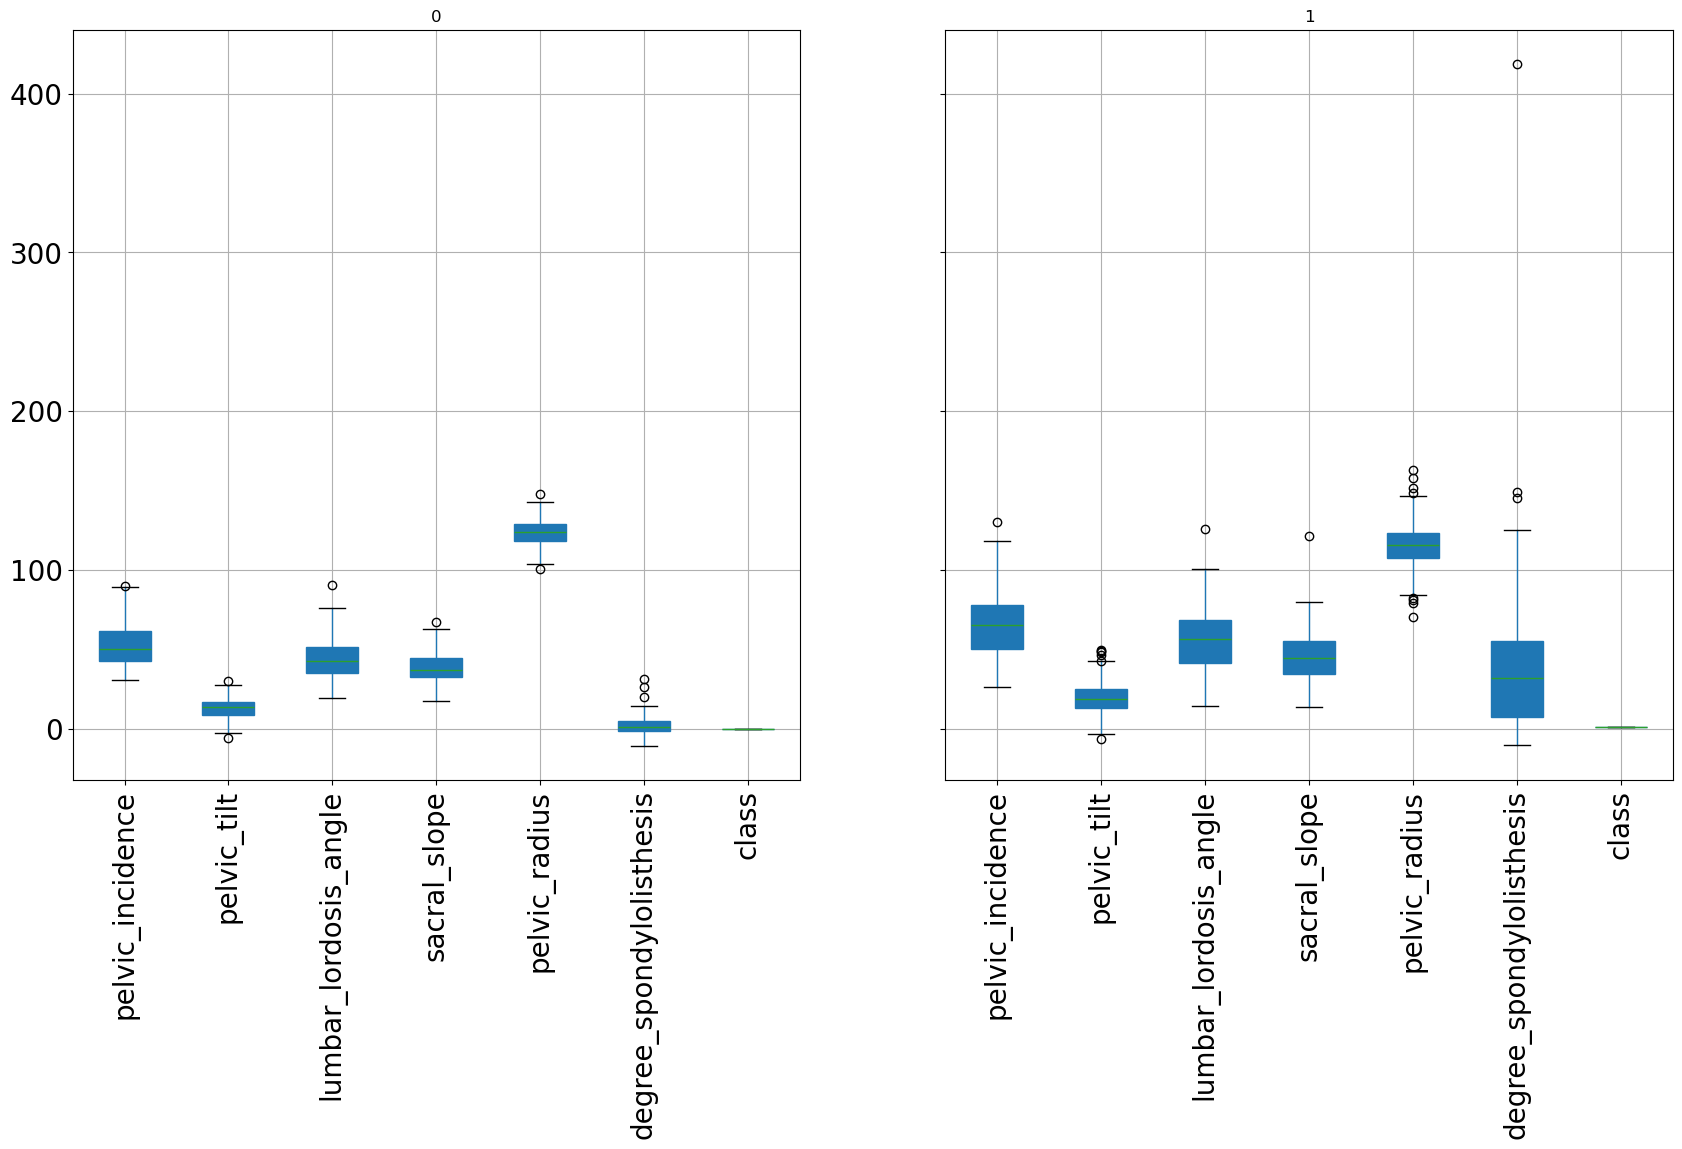

In [17]:
df.groupby('class').boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=True)

Using the **corr** function, you can create a correlation matrix for the entire dataset.

In [18]:
corr_matrix = df.corr()
corr_matrix["class"].sort_values(ascending=False)

class                       1.000000
degree_spondylolisthesis    0.443687
pelvic_incidence            0.353336
pelvic_tilt                 0.326063
lumbar_lordosis_angle       0.312484
sacral_slope                0.210602
pelvic_radius              -0.309857
Name: class, dtype: float64

You can also plot out this data.

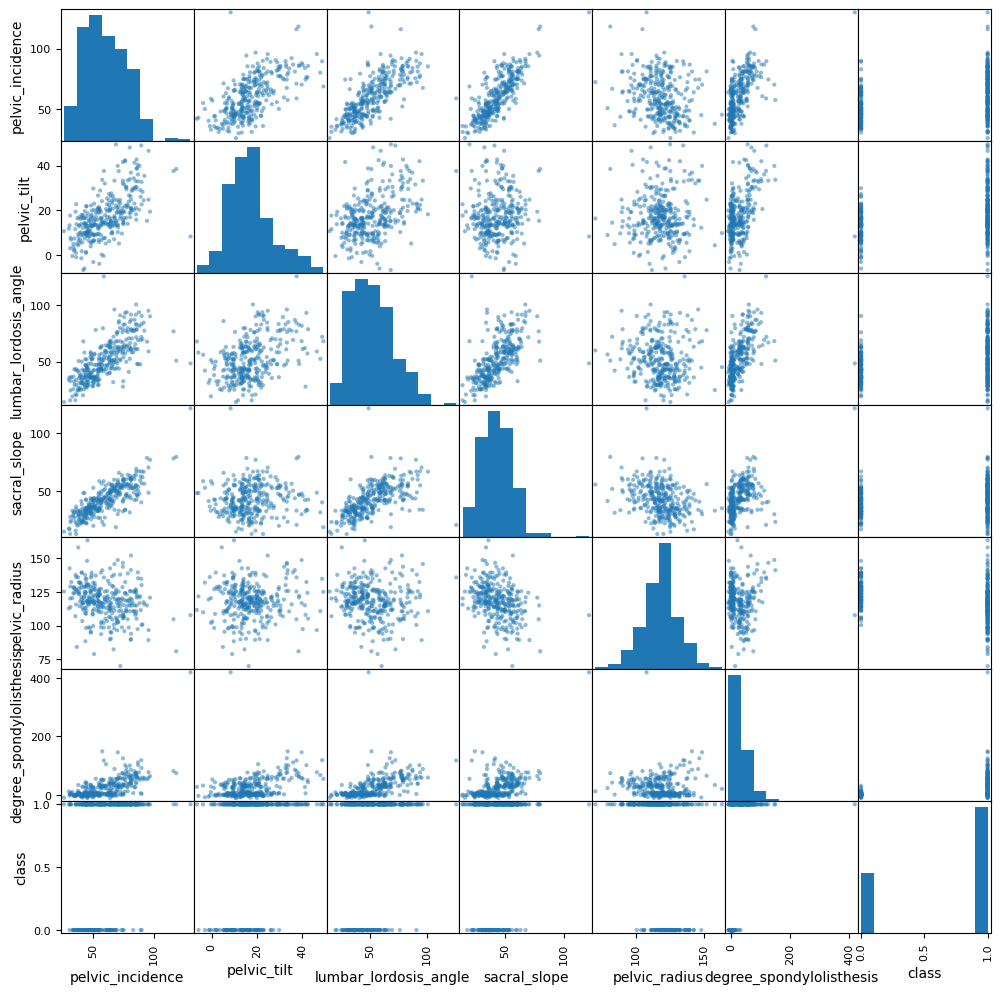

In [19]:
pd.plotting.scatter_matrix(df,figsize=(12,12))
plt.show()

By using **seaborn**, you can visualize the correlation as a *heatmap*.

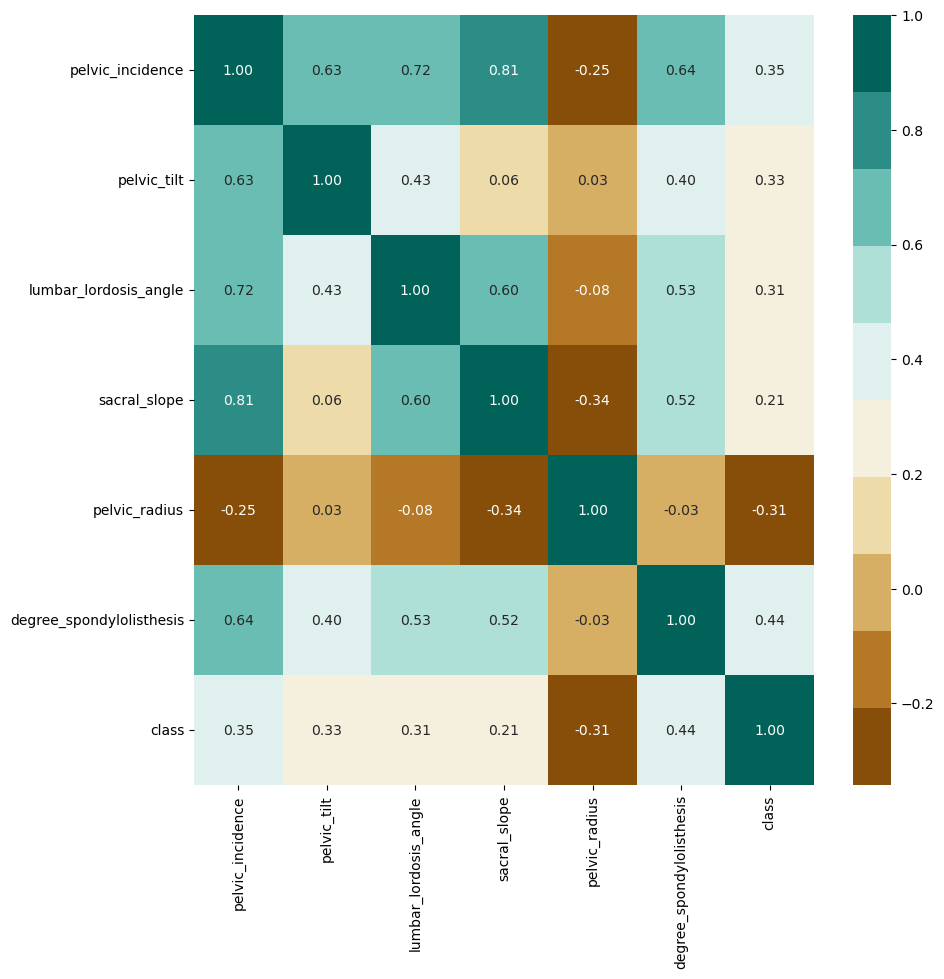

In [20]:
import seaborn as sns
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
# Generate Color Map
# colormap = sns.diverging_palette(220, 10, as_cmap=True)
colormap = sns.color_palette("BrBG", 10)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")
#ax.set_yticklabels(column_names);
plt.show()

**Challenge task:** Find other data from the UCI Machine Learning Repository.  Using the previous code for reference, go explore!


# Congratulations!

You have completed this lab, and you can now end the lab by following the lab guide instructions.